# Import important EDA libraries

In [22]:
print("hello world")

hello world


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the Excel file data into python 

In [6]:
df = pd.read_excel(r"C:\Users\jmasa\OneDrive - University of Johannesburg\Thesis\ML Projects\Python\Cell Voltage\notebooks\data\Cell_Voltage_Combined_9Mar.xlsx")
df.head()

,Current_Density_Acm-2,Pressure_Bar,Temperature_oC,KOH_Concentration_wt%,Electrodes_Gap_mm,Cell_Voltage_V
0,0.018,10,50,28,0.0,1.497
1,0.018,20,50,28,0.0,1.509
2,0.018,30,50,28,0.0,1.506
3,0.018,40,50,28,0.0,1.516
4,0.018,50,50,28,0.0,1.518


In [7]:
df.tail()

,Current_Density_Acm-2,Pressure_Bar,Temperature_oC,KOH_Concentration_wt%,Electrodes_Gap_mm,Cell_Voltage_V
485,0.110,1,50,10,10.0,2.054
486,0.090,1,50,10,10.0,2.019
487,0.078,1,50,10,10.0,1.977
488,0.066,1,50,10,10.0,1.943
489,0.054,1,50,10,10.0,1.902


In [8]:

df.shape

(490, 6)

In [10]:
df.describe()

,Current_Density_Acm-2,Pressure_Bar,Temperature_oC,KOH_Concentration_wt%,Electrodes_Gap_mm,Cell_Voltage_V
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.262045,10.746939,37.918367,18.922449,10.459184,2.104624
std,0.187902,17.417795,16.303407,11.191497,11.866606,0.284081
min,0.007000,1.000000,20.000000,10.000000,0.000000,1.464000
25%,0.100250,1.000000,25.000000,10.000000,0.000000,1.900000
50%,0.215000,1.000000,25.000000,10.000000,10.000000,2.190000
75%,0.392000,10.000000,50.000000,28.000000,10.000000,2.351000
max,0.721000,55.000000,70.000000,50.000000,50.000000,2.505000


# Metadata

1. Cell_Voltage          (1.464-2.505) V
2. Current Density       (0.007-0.721) Acm-2	
3. Pressure              (1-55) Bar
4. Temperature           (20-70) oC
5. KOH_Concentration     (10-50) wt%
6. Electrodes_Gap        (0-50) mm

## Data Checks

In [13]:
# Check for missing values
df.isnull().sum()

Current_Density_Acm-2    0
Pressure_Bar             0
Temperature_oC           0
KOH_Concentration_wt%    0
Electrodes_Gap_mm        0
Cell_Voltage_V           0
dtype: int64

In [14]:
## Check for duplicates
df.duplicated().sum()

np.int64(0)

In [16]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Current_Density_Acm-2  490 non-null    float64
 1   Pressure_Bar           490 non-null    int64  
 2   Temperature_oC         490 non-null    int64  
 3   KOH_Concentration_wt%  490 non-null    int64  
 4   Electrodes_Gap_mm      490 non-null    float64
 5   Cell_Voltage_V         490 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 23.1 KB


# Data Visualisation

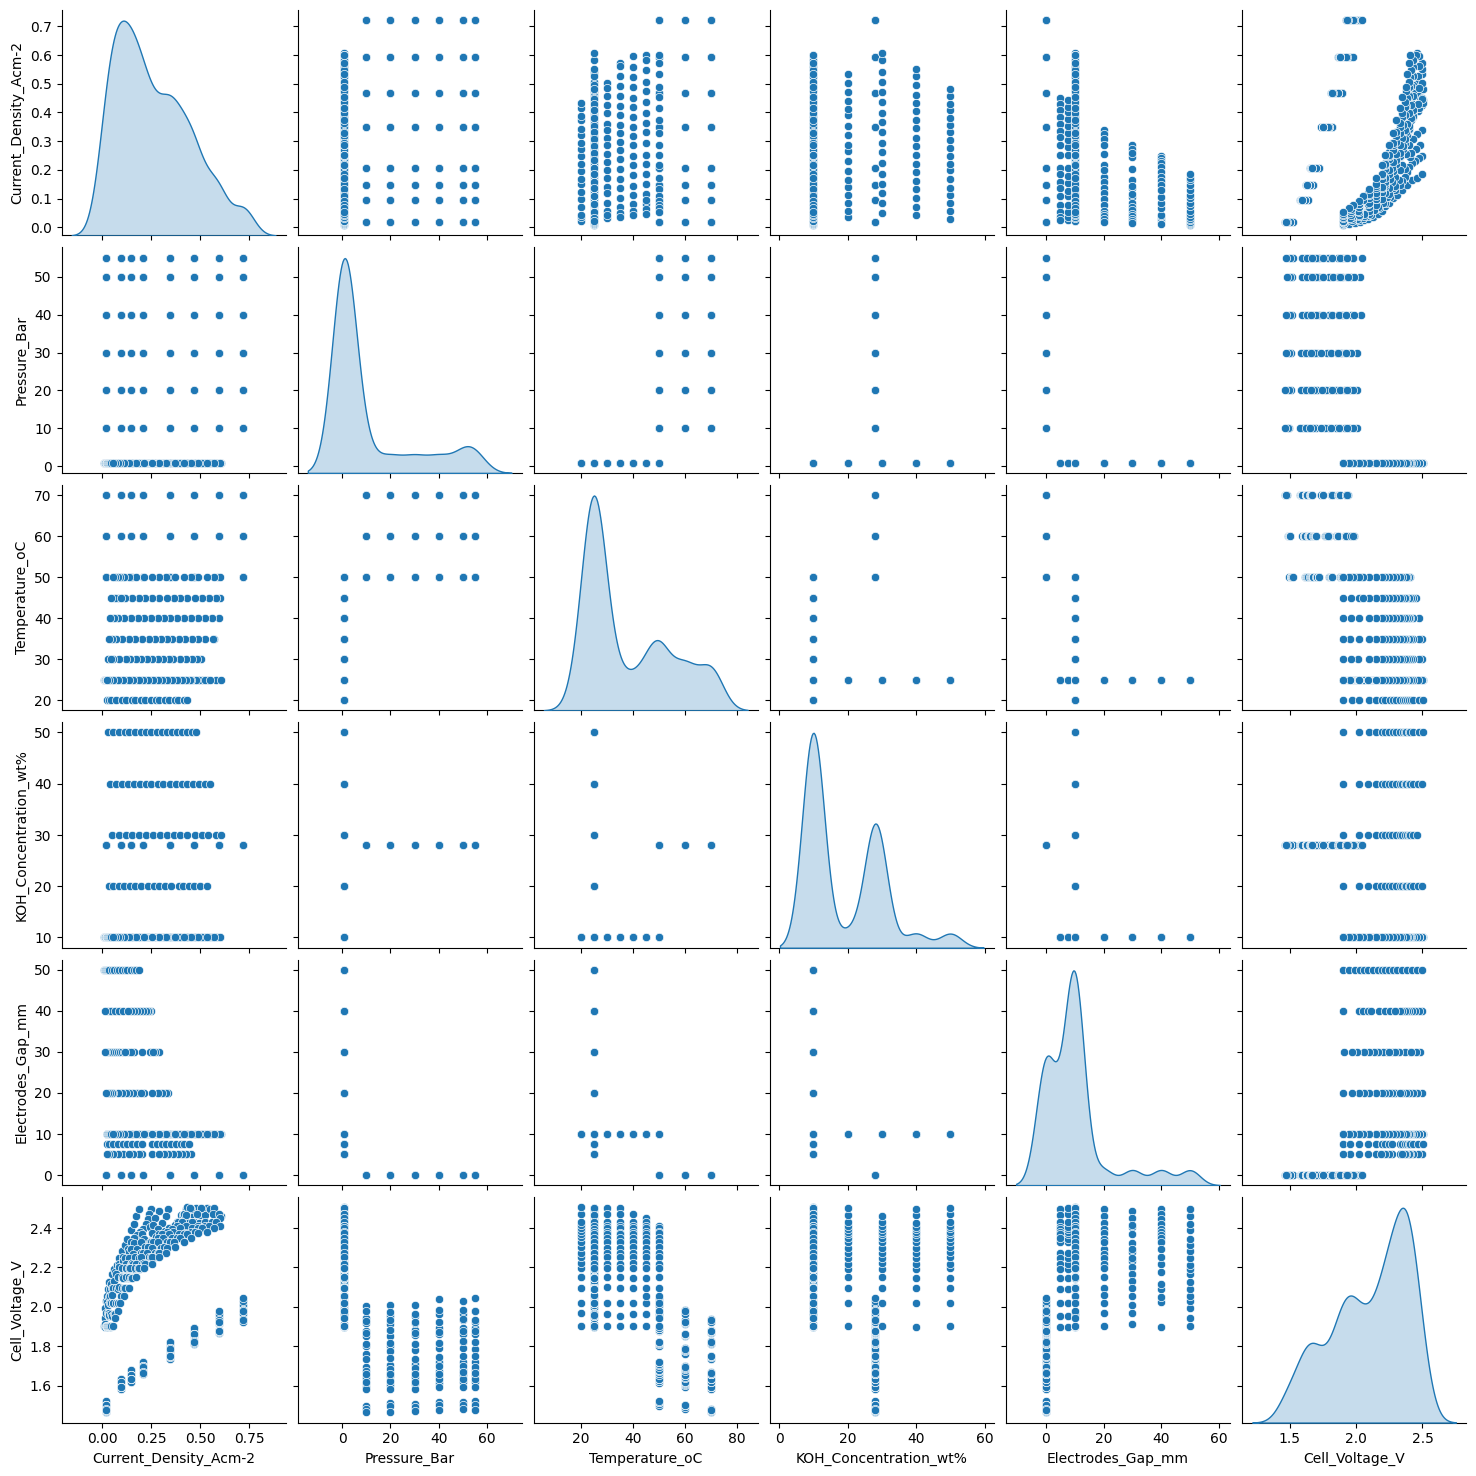

In [17]:
sns.pairplot(df, diag_kind='kde')
plt.show()

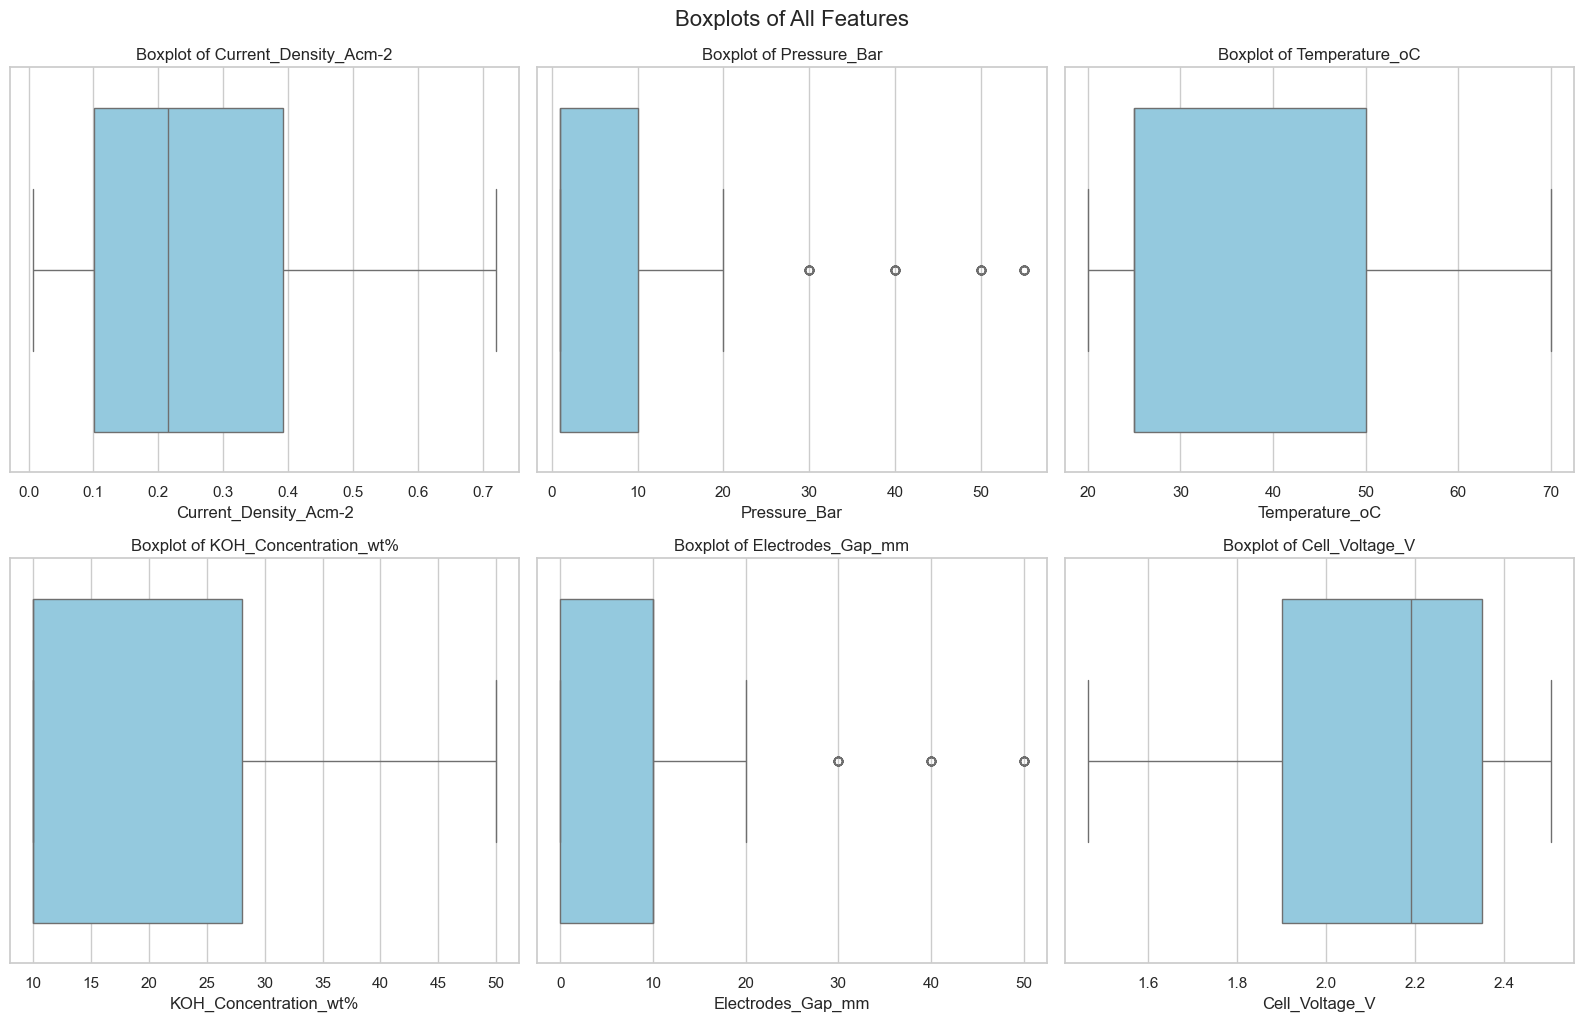

In [18]:
# Set style
sns.set(style="whitegrid")

# Set up figure
plt.figure(figsize=(16, 10))

# Create individual boxplots
for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.suptitle("Boxplots of All Features", fontsize=16, y=1.02)
plt.show()


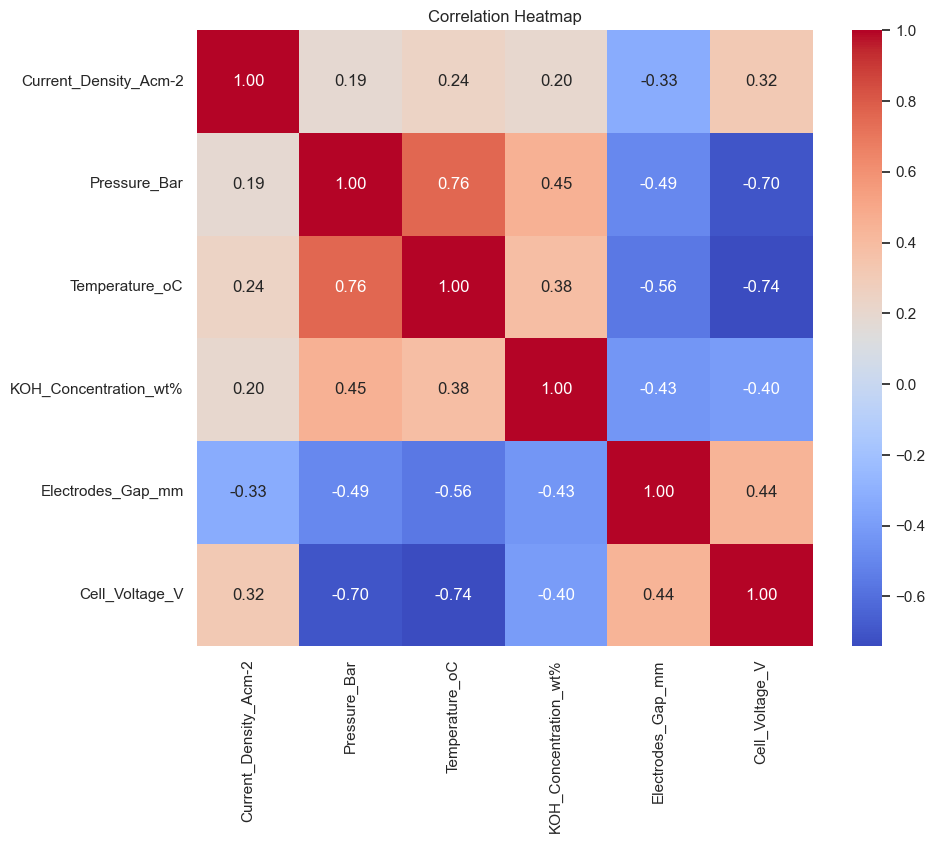

In [19]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()

# Display heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.show()


## Correlation results

Current_Density_Acm-2 has a  positive correlation with Cell_Voltage_V (makes sense: higher current usually increases voltage).

Temperature_oC and Pressure_Bar show strong negative correlations with cell voltage.

KOH_Concentration_wt% show a moderate negative correlation with cell voltage.

Electrodes_Gap_mm shows moderate positive correlation.

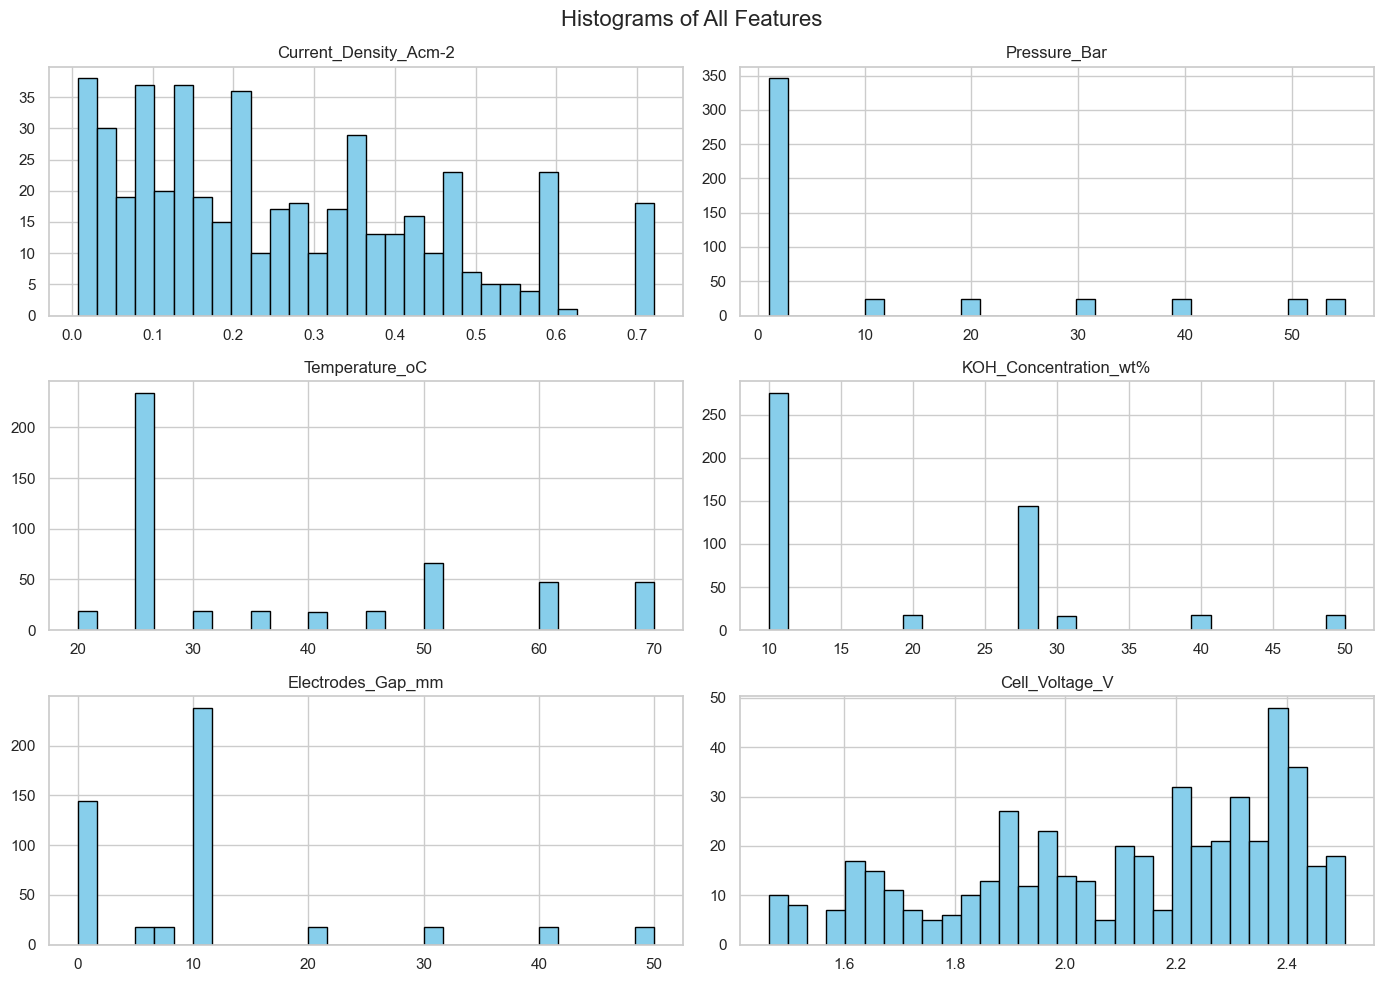

In [21]:
df.hist(figsize=(14, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()


## Insights

Features like KOH_Concentration_wt%, Pressure_Bar,Electrodes_Gap_mm and Temperature_oC have few levels set by design and can therefore be treated as categorical variables, requiring catgorical encoding
They can also be kept as numeric if they have a clear trend (e.g., voltage goes up with concentration).
Treating them as categorical variables helps the model focus on performance at each experimental setup, rather than falsely assuming continuous trends.

Summary

Feature                      | Observed Trend                   | Suggested Treatment                 | Why
KOH_Concentration_wt%        | Appears to have a steady trend   | Numeric or Categorical (try both)   | If voltage increases smoothly, keep numeric. If effect is stepwise or nonlinear, use categorical.                    

Pressure_Bar                 | Appears non-linear & stepped     | Categorical                         | Pressure is often changed in steps — treat as experimental level unless clearly linear.

Electrodes_Gap_mm            | Discrete gaps, unclear trend     | Categorical                         | These are fixed design settings; treat as design-level categories.

Temperature_oC               | Seems increasing trend            | Numeric or Categorical             | Try both: if the model learns a good linear/curved relationship, keep numeric; else treat as categorical.


## For ML experimentation:

Train one model with all design features as numeric.

Train another where features with few discrete levels are treated as categorical.

Compare performance — especially with non-linear models like RandomForest or XGBoost.

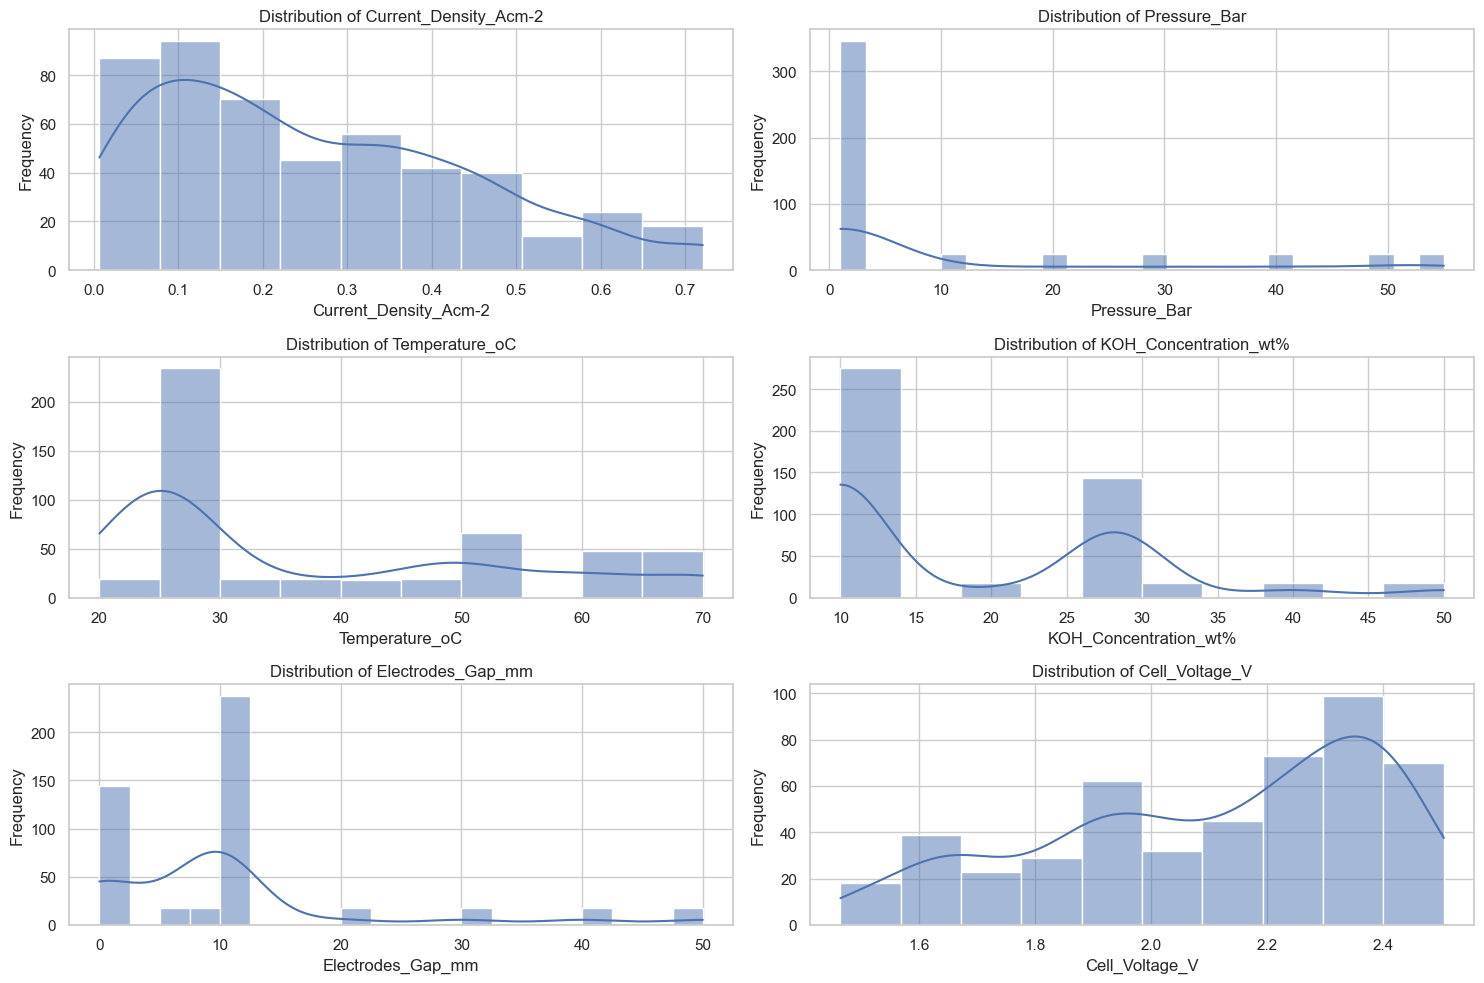

In [24]:
# Plot histograms for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Insights

Features like Pressure_Bar and KOH_Concentration_wt% are skewed i.e. non symmetrical data distribution
Machine learning models (especially linear ones) often perform better when numeric features have a more normal (bell-shaped) distribution.
Algorithms like Linear Regression, KNN, SVM, etc. can be sensitive to skewness. Tree based models are unaffected
A log transformation (or square root, Box-Cox, etc.) can make the feature's distribution more symmetrical and help the ML model learn better relationships.

In [25]:
# Calculate correlation coefficient
corr_value = df['Current_Density_Acm-2'].corr(df['Cell_Voltage_V'])
print(f"Correlation between Current Density and Cell Voltage: {corr_value:.3f}")


Correlation between Current Density and Cell Voltage: 0.318


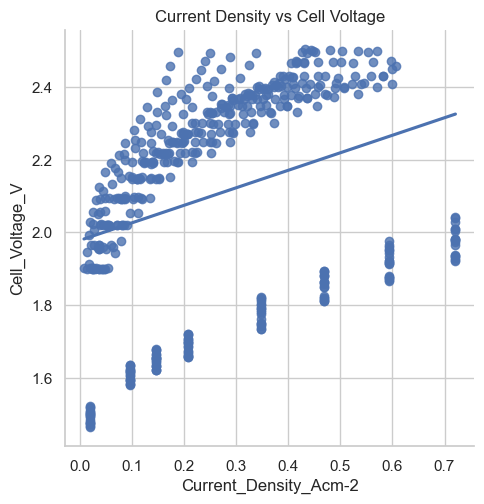

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with linear regression fit
sns.lmplot(data=df, x='Current_Density_Acm-2', y='Cell_Voltage_V', ci=None)
plt.title("Current Density vs Cell Voltage")
plt.show()
